<div style="text-align: right">Ioannis Karakasoglou Breier, 03 Apr 2017</div> 

# Data Analyst Nanodegree

### P2: Investigate a Dataset (Titanic Data)

![Titanic Ad](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/RMS_Titanic_Ad_April_10%2C_1912.jpg/400px-RMS_Titanic_Ad_April_10%2C_1912.jpg)
<center><a href="https://en.wikipedia.org/wiki/RMS_Titanic">Display ad for Titanic's first but never made sailing from New York on 20 April 1912 </a><br></center>

### Dataset Information/ Data Dictionary/Variable Notes

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

[Titanic Data](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv) - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

**Variable**|**Definition**	|**Key** 
----------|-----------------|------
Survived  |	Survival	|0 = No, 1 = Yes    
Pclass	  |  Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd 
Sex	       | Sex	
Age	        |Age in years	
Sibsp	    |# of siblings / spouses aboard the Titanic	
Parch	    |# of parents / children aboard the Titanic	
Ticket	    |Ticket number	
Fare	    |Passenger fare	
Cabin	    |Cabin number	
Embarked	|Port of Embarkation |C = Cherbourg, Q = Queenstown,S = Southampton

**Pclass**: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

**Age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**Sibsp**: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

**Parch**: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

## Initial Questions

- What was the composition of the passengers regarding Gender, Cabin Class, Age, Family, Port of Embarkation.
- How did this composition change for the passengers that survived and those that didn't.
- What factors made people more likely to survive

## Initial Data Investigation

We will load the necessary Python libraries for our analysis and set some parameters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline
plt.style.use('seaborn-notebook')

### Data Acquisition

In [2]:
#Load the CSV into a Pandas Dataframe
titanic_data = pd.read_csv('titanic-data.csv')

Let's take a first look of our Dataframe using pandas descriptive statitstics functions

In [3]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We observe that there are missing values at the Age, Cabin and Embarked columns.

### Data Cleaning

Since most of `Cabin` column values are missing we will omit this column along with the `Ticket`, `Fare`, `PassengerId` and `Name` columns that we will not use for this initial investigation. We will make a new Dataframe in case we want to access the initial one again.

In [5]:
#Drop the unwanted columns
n_titanic_data=titanic_data.drop(['Cabin','Ticket','Name',
                                  'Fare','PassengerId'],axis=1)

In [6]:
n_titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [7]:
n_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


We have only 714 `Age` values out of 891 of the entries and 2 values missing from the `Embarked` Variable. We will have to decide whether to omit these or impute them with some values when we model relationships based on `Age` or `Embarked`.

Imputing missing data is a complicated procedure and creating and evaluating a regression model to predict them based on the other variables is out of the scope of this analysis.  
However, by using the mean or median , we can bias any relationships that we are modeling.[[1]](#[1])  [[2]](#[2]) .   

Therefore we will choose to omit the missing `Age` and `Embarked` data whenever we are modeling relationships based on these two variables using the _Available-case Analysis_[[3]](#[3]) method (Where different aspects of the problem are studied with different subsets of the data) and accept the limitations of this approach (Lack of consistency between analyzed subsets).

### Further Exploration - Conclusions - Visualizations

We will change the keys to make them better readable and explore the initial composition of the passengers.

In [8]:
#Make another copy of the new dataframe
descript = n_titanic_data.copy()

#Change the embarked keys to better readable ones
descript.loc[:,'Embarked'].replace(['C','S','Q'],
                                      ['1: Cherbourg','2: Southampton','3: Queenstown'],
                                      inplace=True)
#And the survived keys
descript.loc[:,'Survived'].replace([0,1],['no','yes'],inplace=True)

_We will make a function for this operation since we will use for the other variables as well_.

In [9]:
# Make a function to get the composition of the variables per number of passengers
def comp_plot(col,df):
    '''
    Group by col1, sort by size , return and plot the dataframe
    '''
    gr=pd.DataFrame()
    gr['Passenger No'] = df.groupby(col).size()
    gr['Passenger ratio'] = np.round(gr['Passenger No'].divide(gr['Passenger No'].sum())*100,0)
    
    print ('Total No. of Passengers:{}').format(gr['Passenger No'].sum())
    gr.plot(kind='bar')
    plt.ylabel('Passenger ');
    return gr

We will start with the `Embarked` variable.

Total No. of Passengers:889


,Passenger No,Passenger ratio
Embarked,,
1: Cherbourg,168,19.0
2: Southampton,644,72.0
3: Queenstown,77,9.0


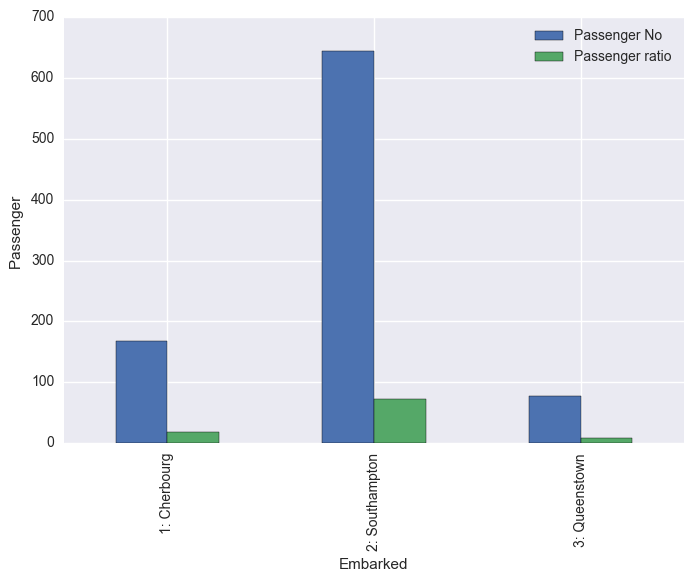

In [10]:
comp_plot('Embarked',descript)

We see that the majority of passengers (644 of 889 - 72%) embarked in Southhampton and only 77 passengers - 9% -  embarked in Queenstown

Let's examine the percentages of passengers that survived ,depending on their port of embarkation.

_We will make a function for this operation since we will use for the other variables as well_

In [11]:
def perc_bar(col1, col2,df):
    '''
    Group a Dataframe df by Col1 and Col2, sort by size and unstack by Col1
    Return the grouped Dataframe and plot a bar plot
    '''
    #Group by Survived and Embarked and unstack by Survived
    grouped = df.groupby([col1,col2]).size().unstack(col1)

    #Tranform to percentages
    grouped = np.round(grouped.divide(grouped.sum(axis=1),axis=0)*100,0)

    # plot and return table
    grouped.plot(kind='bar',stacked=False)
    plt.ylabel('Percentage');
    return grouped

Survived,no,yes
Embarked,,
1: Cherbourg,45.0,55.0
2: Southampton,66.0,34.0
3: Queenstown,61.0,39.0


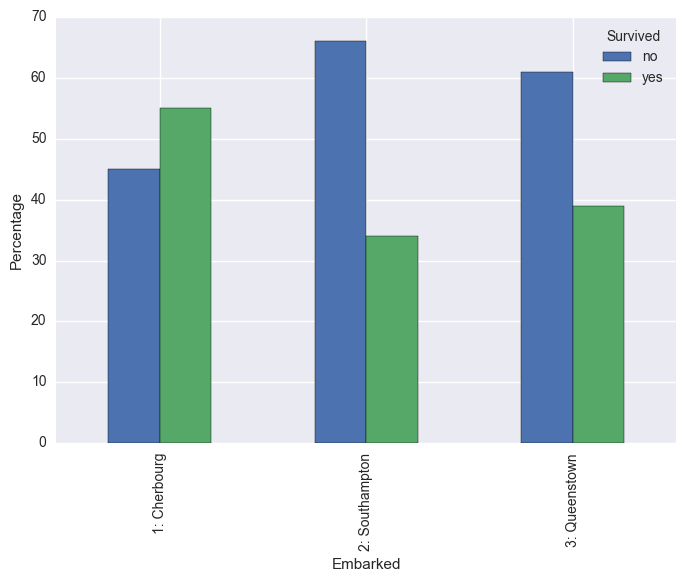

In [12]:
perc_bar('Survived', 'Embarked', descript)

We see that 55% of passengers embarked in Cherbourg survived compared to 34% and 39% at Southhampton and Queensberg respectively.

This is counter-intuitive at a first look. Investigating deeper into the composition of the passengers regarding their gender and their class may given us more information about this relationship.

Pclass,1,2,3
Embarked,,,
1: Cherbourg,51.0,10.0,39.0
2: Southampton,20.0,25.0,55.0
3: Queenstown,3.0,4.0,94.0


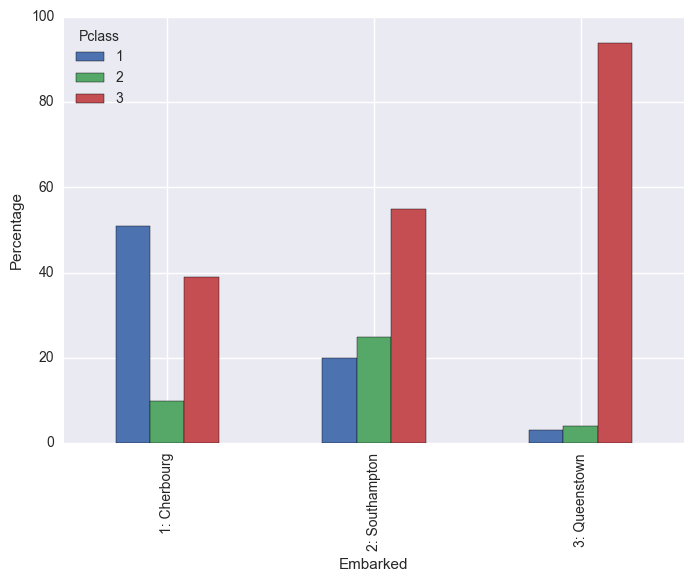

In [13]:
#Calculate percentages of port passengers per Class
perc_bar('Pclass','Embarked',descript)

51% of the passengers embarked in Cherbourg are in the 1st Pclass compared to 20% and 3% respectively for Southhampton and Queenstown.

It looks like the class may play a role in port of embarkation's relationship with survibability.

Let's explore the survivability based on the `Pcclass` variable further.

Survived,no,yes
Pclass,,
1,37.0,63.0
2,53.0,47.0
3,76.0,24.0


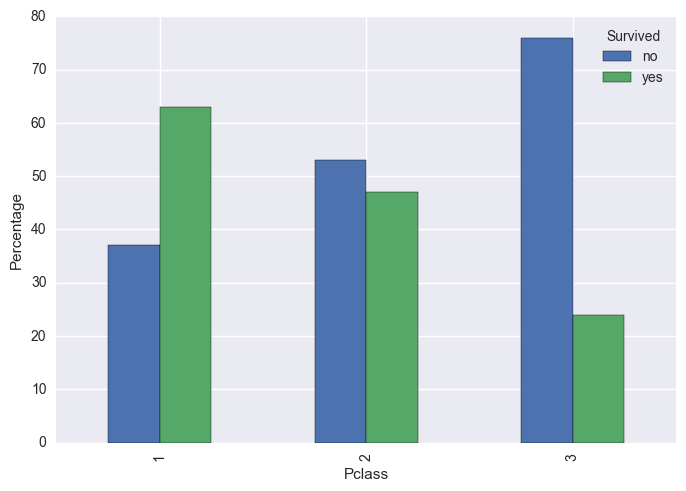

In [14]:
perc_bar('Survived', 'Pclass',descript)

63% of 1st class passengers survived compared to 47% and 24% for the 2nd and 3rd class respectively.

Indeed, survivability seems to be correlated with the `Pcclass` and this could be the main factor behind the correlation with the port of embarkation as well.

Let's investigate `Embarked` and the correlation with `Sex`

Sex,female,male
Embarked,,
1: Cherbourg,43.0,57.0
2: Southampton,32.0,68.0
3: Queenstown,47.0,53.0


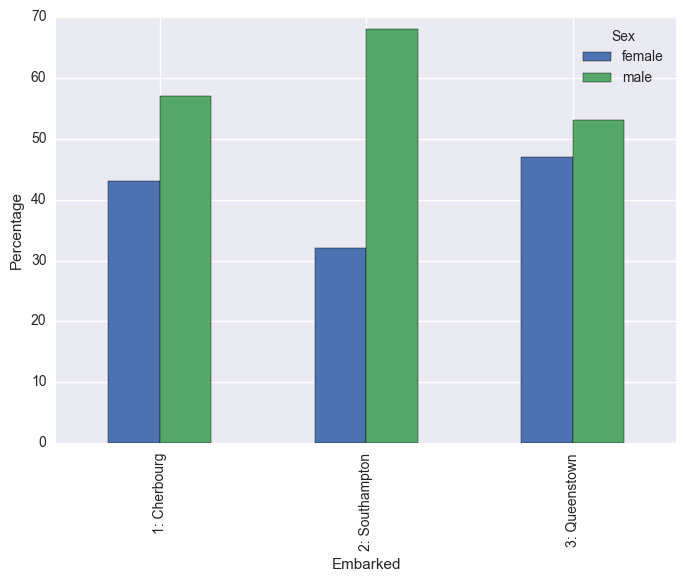

In [15]:
#Calculate percentages of port passengers per Sex
perc_bar('Sex','Embarked',descript)

There does not seem to be a clear pattern  related to `Sex` that could be contributing to the increased survivability of the Cherbourg passengers.

Let's see the `Sex` composition of the whole population.

Total No. of Passengers:891


,Passenger No,Passenger ratio
Sex,,
female,314,35.0
male,577,65.0


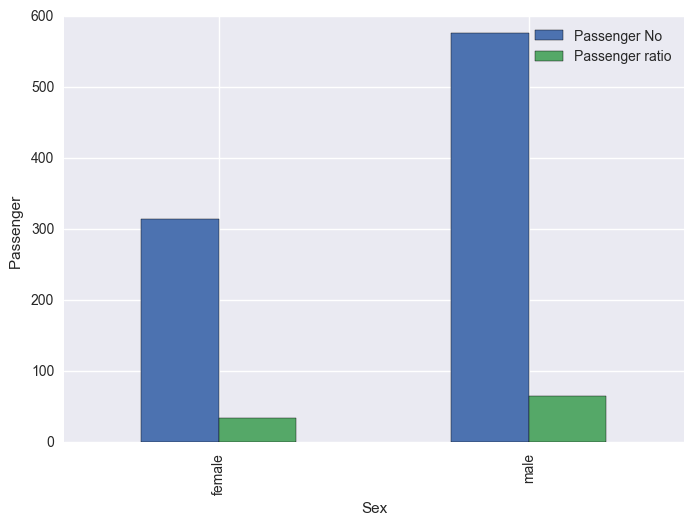

In [16]:
comp_plot('Sex',descript)

And of the `Pclass`.

Sex,female,male
Pclass,,
1,44.0,56.0
2,41.0,59.0
3,29.0,71.0


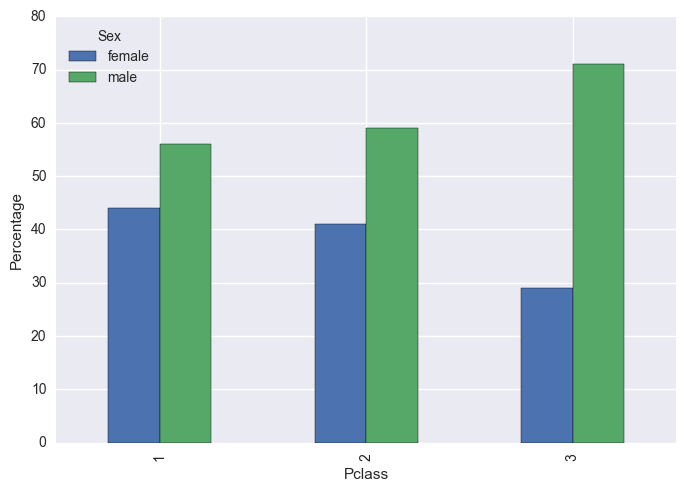

In [17]:
#Calculate percentages of Pclass per Sex
perc_bar('Sex','Pclass',descript)

We observe that the 3rd class has a higher than average (71 % vs 65%) male percentage.

And the survivability based on `Sex`

Survived,no,yes
Sex,,
female,26.0,74.0
male,81.0,19.0


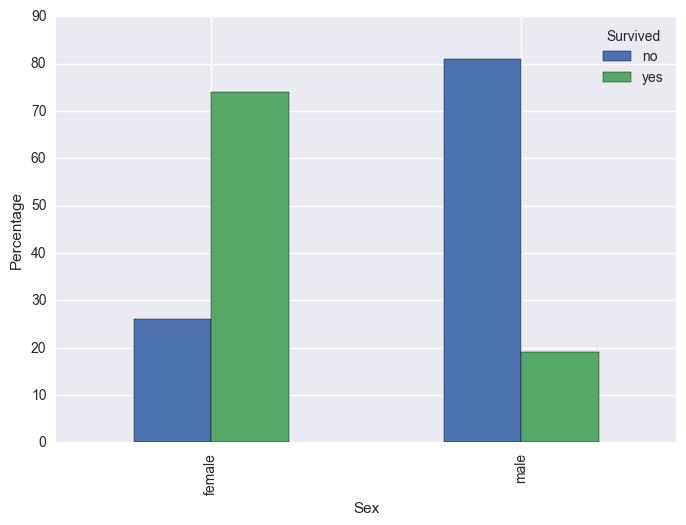

In [18]:
perc_bar('Survived', 'Sex', descript)

74% of females survived compared to 19% for males. 44% of the 1st class(which had a 65% survivability) comprised of females compared to 29% of the third class (24% survivability).

Further statistical tests  need to be conducted but it seems that the rule 'Women and children first' has strong effect on the correlation of other variables to survivability as well.

Let's examine now the age distribution of the passengers and how `Age` affected their chances of survival.

We will start with a plot of the entire population.

In [29]:
#Make a dataframe for non missing 'Age'values
not_missing = n_titanic_data[(n_titanic_data['Age'].notnull())] 

#And replace the survived keys
not_missing.loc[:,'Survived'].replace([0,1],['no','yes'],inplace=True)

print ('No. of Passengers with not missing Age Values:{}'.format(len(not_missing)))

No. of Passengers with not missing Age Values:714


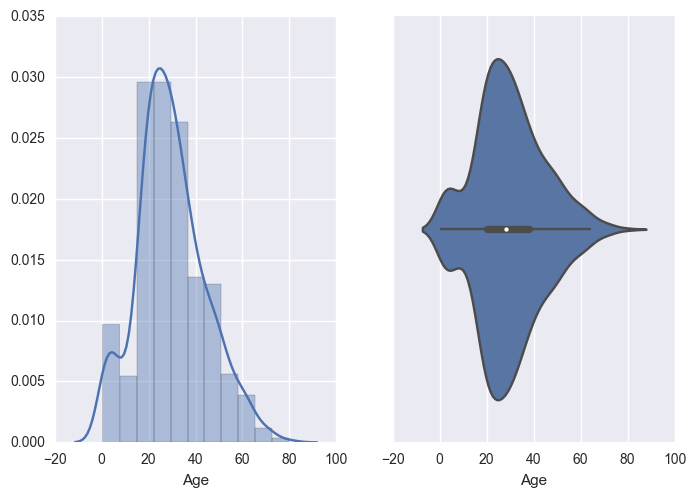

In [20]:
ax=plt.figure()
ax.add_subplot(121)
sns.distplot(not_missing['Age'],bins=11)
ax.add_subplot(122)
sns.violinplot(not_missing['Age']);

In [21]:
# Get summary descriptive statistics
v= pd.DataFrame(not_missing['Age'].describe())

#Change the index labels and round the values reported
v.index = ['Population Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
v = v.round(decimals=3)
v

,Age
Population Size,714.000
Mean,29.699
Std. Deviation,14.526
Min,0.420
25% Qt,20.125
Median,28.000
75% Qt,38.000
Max,80.000


And the density distribution and boxplot of the `Age` variable depending by survivability.

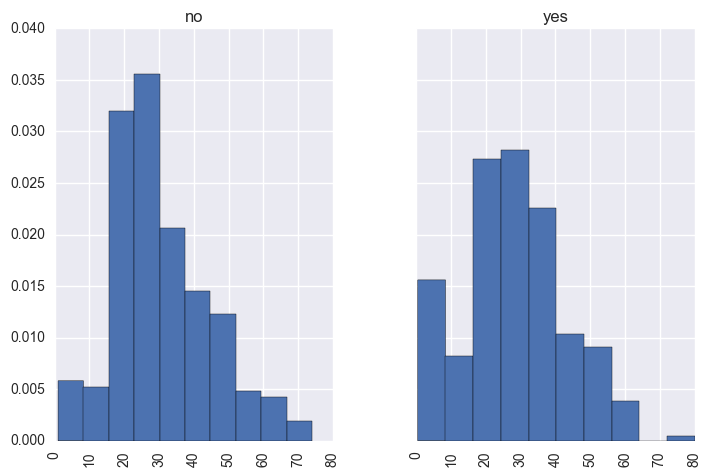

In [22]:
not_missing.hist(column="Age",by="Survived",sharey=True,normed=True);

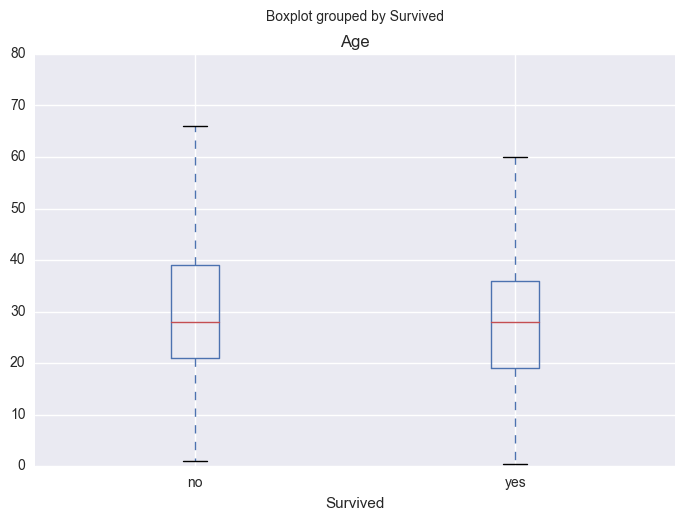

In [23]:
not_missing.boxplot(column="Age",by="Survived");

We observe that the percentage of children below 10 that survived was significantly higher and almost nobody over 70 year's old survived.
We would like to examine if this was by luck or by some other underlying reason (like the 'Women and Children first' rule).

In [24]:
#Make a datframe with the sample populations
age = pd.DataFrame()
age['all'] = not_missing['Age']
not_survived = age['not-survived'] = not_missing['Age'][not_missing['Survived']=='no']
survived = age['survived'] = not_missing['Age'][not_missing['Survived']=='yes']

#Get the summary statistics
var = age.describe()

#Change the index labels and round the values reported
var.index = ['Sample Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
var = var.round(decimals=3)

The not-survived and survived age populations have the following descriptive statistics:

In [25]:
var.loc[:,['not-survived','survived']]

,not-survived,survived
Sample Size,424.000,290.000
Mean,30.626,28.344
Std. Deviation,14.172,14.951
Min,1.000,0.420
25% Qt,21.000,19.000
Median,28.000,28.000
75% Qt,39.000,36.000
Max,74.000,80.000


We will conduct a statistical _chi-squared test_  to establish whether the `Survived` and `Age` variables are related.

Dependent Variable: `Survived`   
Independent Variable: `Age`   

$O_{i}$: the observed value of survived for the given age  
$E_{i}$: the expected value of survived for the given age   

We will test the following hypotheses:

$H_0$: The Null Hypothesis, that there is no relationship between the `Survived` and `Age` variables (independent)  $\rightarrow  O_{i} \neq E_{i}$    

$H_A$: The Alternative Hypothesis, that there is  a relationship between the `Survived` and `Age` variables (dependent) $\rightarrow O_{i} = E_{i}$    

In [30]:
#Create age-groups
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
              '70-80']
age_group_values = pd.cut(not_missing.Age, range(0,81,10),
                                   right=False, labels=age_labels)
not_missing.loc[:,'age-groups'] = age_group_values

#Set the value for the one 80-year old outside the bins 
#chi-squared is notvalid for no of observations below 5
not_missing.loc[not_missing['Age']>=80, 'age-groups'] = '70-80'

#Make an observed-table for chi-squared test
obs_table = pd.crosstab([not_missing['Survived']],[not_missing['age-groups']])

In [31]:
obs_table

age-groups,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-80
Survived,,,,,,,,
no,24,61,143,94,55,28,13,6
yes,38,41,77,73,34,20,6,1


We will compute the Pearson's Chi-square statistic based on the observations table.

In [32]:
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))

chi2:17.4277216059
dof:7
p:0.0148368781128


For a=.05 and 7 degrees of freedom, p is smaller than 0.05 and we therefore reject the Null-Hypothesis and accept that `Survived` and `Age` are dependent variables and that there is indeed a relationship between age and survivability.

Further statistical tests can be conducted to explore in more detail their relationship and correlation.

### Note

- All conclusions above are tentative and and subject to further investigation and statistical tests.

- The missing Age values could be adding an undefined bias to our hypothesis test and conclusions.

### References/Sources

[1]<a name='[1]'></a>:<https://discussions.udacity.com/t/help-predicting-missing-age-values-in-titanic-dataset/194349/2>   
[2]<a name='[2]'></a>:<https://discussions.udacity.com/t/missing-age-titanic-data/165798/2>   
[3]<a name='[3]'></a>:<http://www.stat.columbia.edu/~gelman/arm/missing.pdf>  
[4]<a name='[5]'></a>:<http://www.ling.upenn.edu/~clight/chisquared.htm>